# Timeseries Trend of Keywords extracted using TFIDF

In [ ]:
%matplotlib inline
from konlpy.tag import Kkma
from ckonlpy.tag import Twitter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import countVectorizer
from sklearn.preprocessing import noramlize
from datetime import date
import numpy as np
import pandas as pd
import operator

In [ ]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

In [ ]:
### 이미지1
df_TRkeywords=pd.read_csv('./Data(Pagerank)/OUTPUT/cube_dept_keywords.csv',encoding='cp949')
del df_TRkeywords['Unnamed: 0']
df_TRkeywords

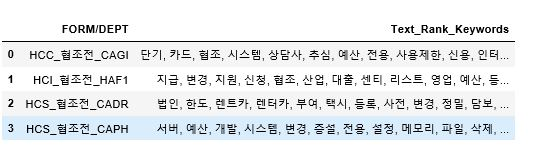

## PageRank keyword 기준 단어 월별 트렌드 그래프
## Monthly trend graph of PageRank keywords

In [ ]:
### 이미지2
# 원본 tfidf 수치 plot
for dept in range(np.size(df_TRkeywords,axis=0)):
    target_code1=df_TRkeywords.iloc[dept,0].split('_')[0]
    target_code2=df_TRkeywords.iloc[dept,0].split('_')[2]
    target_code3=df_TRkeywords.iloc[dept,0].split('_')[1]
    
    keyword_list=df_TRkeywords.iloc[dept,1].split(', ')
    
    filename='./Data(Pagerank)/Temp/tfidf/'+target_code1+'_'+target_code2+'_'+target_code3+'_월별_tfidf.csv'
    df_tfidf_month=pd.read_csv(filename,error_bad_lines=False,encoding='cp949',engine='python')
    del df_tfidf_month['Unnamed: 0']
    
    tfidf_month_pr50=np.zeros((np.size(keyword_list),np.size(df_tfidf_month.columns)),dtype=float)
    keyword_stats=np.zeros(np.size(keyword_list),dtype=float)
    
    for i,keyword in enumerate(keyword_list):
        for j in range(np.size(df_tfidf_month.columns)):
            for k in list(df_tfidf_month.iloc[:,j]):
                if keyword in k:
                    tfidf_month_pr50[i,j]=float(k.split(': ')[1])
                    break
#         keyword_stats[i]=(np.max(tfidf_month_pr50[i,:])-np.min(tfidf_month_pr50[i,:]))/np.mean(tfidf_month_pr50[i,:])
        keyword_stats[i]=(np.max(tfidf_month_pr50[i,:])-np.min(tfidf_month_pr50[i,:]))
    
    fig1,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(16,32))
    
    ax1.set_title('Top1~5',size=15)
    for i in np.argsort(keyword_stats)[::-1][:5]:
        ax1.plot(tfidf_month_pr50[i,:],label=keyword_list[i])
    plt.sca(ax1)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg1=ax1.legend(fontsize=12,loc='upper_left');
    
    ax2.set_title('Top5~10',size=15)
    for i in np.argsort(keyword_stats)[::-1][5:10]:
        ax2.plot(tfidf_month_pr50[i,:],label=keyword_list[i])
    plt.sca(ax2)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg2=ax2.legend(fontsize=12,loc='upper_left');
    
    ax3.set_title('Top10~15',size=15)
    for i in np.argsort(keyword_stats)[::-1][10:15]:
        ax3.plot(tfidf_month_pr50[i,:],label=keyword_list[i])
    plt.sca(ax3)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg3=ax3.legend(fontsize=12,loc='upper_left');
    
    ax4.set_title('Top15~20',size=15)
    for i in np.argsort(keyword_stats)[::-1][15:20]:
        ax4.plot(tfidf_month_pr50[i,:],label=keyword_list[i])
    plt.sca(ax4)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg4=ax4.legend(fontsize=12,loc='upper_left');
    
    plt.tight_layout()
    plt.savefig('./Data(Pagerank)/Temp/keyword_trend/'+target_code1+'_'+target_code2+'_'+target_code3+'.png')
    plt.close()

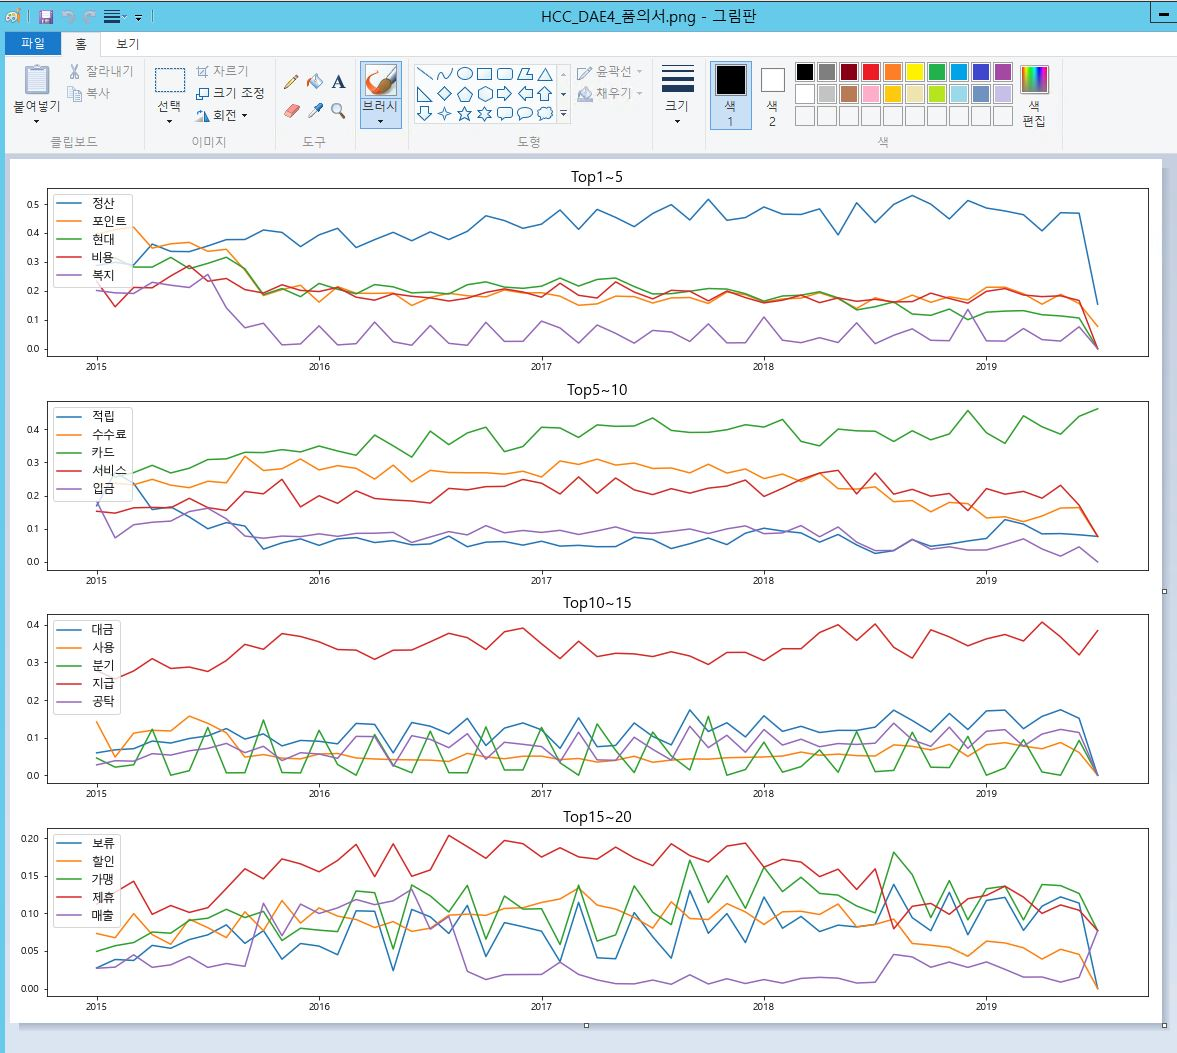

In [ ]:
### 이미지3
# tfidf 수치 -1계 차분값 plot
for dept in range(np.size(df_TRkeywords,axis=0)):
    target_code1=df_TRkeywords.iloc[dept,0].split('_')[0]
    target_code2=df_TRkeywords.iloc[dept,0].split('_')[2]
    target_code3=df_TRkeywords.iloc[dept,0].split('_')[1]
    
    keyword_list=df_TRkeywords.iloc[dept,1].split(', ')
    
    filename='./Data(Pagerank)/Temp/tfidf/'+target_code1+'_'+target_code2+'_'+target_code3+'_월별_tfidf.csv'
    df_tfidf_month=pd.read_csv(filename,error_bad_lines=False,encoding='cp949',engine='python')
    del df_tfidf_month['Unnamed: 0']
    
    tfidf_month_pr50=np.zeros((np.size(keyword_list),np.size(df_tfidf_month.columns)),dtype=float)
    keyword_stats_diff=np.zeros(np.size(keyword_list),dtype=float)
    
    for i,keyword in enumerate(keyword_list):
        for j in range(np.size(df_tfidf_month.columns)):
            for k in list(df_tfidf_month.iloc[:,j]):
                if keyword in k:
                    tfidf_month_pr50[i,j]=float(k.split(': ')[1])
                    break
#         keyword_stats_diff[i]=np.sum(np.abs(tfidf_month_pr50[i,1:]-tfidf_month_pr50[i,:-1]))
        keyword_stats_diff[i]=np.max(np.abs(tfidf_month_pr50[i,1:]-tfidf_month_pr50[i,:-1]))
    
    fig1,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(16,32))
    
    ax1.set_title('Top1~5',size=15)
    for i in np.argsort(keyword_stats_diff)[::-1][:5]:
        ax1.plot(np.abs(tfidf_month_pr50[i,1:]-tfidf_month_pr50[i,:-1]),label=keyword_list[i])
    plt.sca(ax1)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg1=ax1.legend(fontsize=12,loc='upper_left');
    
    ax2.set_title('Top5~10',size=15)
    for i in np.argsort(keyword_stats_diff)[::-1][5:10]:
        ax2.plot(np.abs(tfidf_month_pr50[i,1:]-tfidf_month_pr50[i,:-1]),label=keyword_list[i])
    plt.sca(ax2)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg2=ax2.legend(fontsize=12,loc='upper_left');
    
    ax3.set_title('Top10~15',size=15)
    for i in np.argsort(keyword_stats_diff)[::-1][10:15]:
        ax3.plot(np.abs(tfidf_month_pr50[i,1:]-tfidf_month_pr50[i,:-1]),label=keyword_list[i])
    plt.sca(ax3)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg3=ax3.legend(fontsize=12,loc='upper_left');
    
    ax4.set_title('Top15~20',size=15)
    for i in np.argsort(keyword_stats_diff)[::-1][15:20]:
        ax4.plot(np.abs(tfidf_month_pr50[i,1:]-tfidf_month_pr50[i,:-1]),label=keyword_list[i])
    plt.sca(ax4)
    plt.xticks([0,12,24,36,48],['2015','2016','2017','2018','2019']) # 0,12,24,36,48은 년 개월수
    leg4=ax4.legend(fontsize=12,loc='upper_left');
    
    plt.tight_layout()
    plt.savefig('./Data(Pagerank)/Temp/keyword_trend/'+target_code1+'_'+target_code2+'_'+target_code3+'_diff.png')
    plt.close()

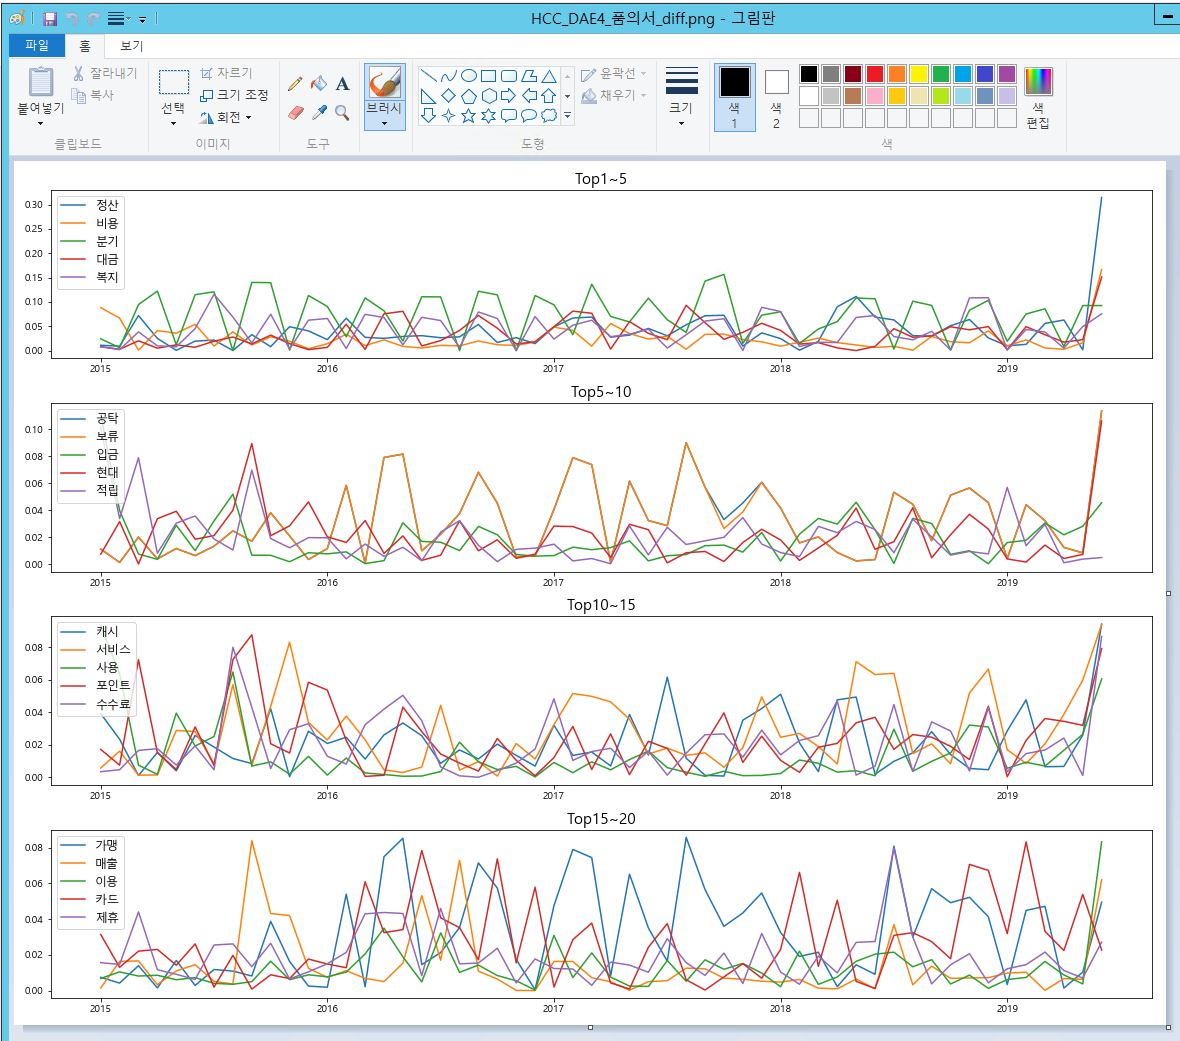